In [ ]:
root = "/content/drive/My Drive/FER/"
# import the necessary packages
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(root+"Dataset/FER-2013/shape_predictor_68_face_landmarks.dat")

In [ ]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(root+"Dataset/FER-2013/Training_11204.jpg")
image = imutils.resize(image, width=48)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

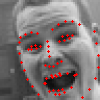

In [ ]:
# detect faces in the grayscale image
rects = detector(gray, 1)

# Passes through loop if no face found
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
	#(x, y, w, h) = face_utils.rect_to_bb(rect)
	#cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

	# show the face number
	#cv2.putText(image, "Face #{}".format(i+1), (x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

	# loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x,y), 1, (0,0,255), -1)

# show the output image with the face detections + facial landmarks
cv2_imshow(image)